## Prediction from Titanic Dataset

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

### Reading the Data from csv file

In [2]:
df = pd.read_csv('M:\Internships\EiSystems\Titanic_dataset\Titanic-Dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape


(891, 12)

### checking for null values

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Feature Engnineering

In [6]:
#extracting the reqired feature from the dataset.
X = df[['Pclass','Age','Sex']]
y = df['Survived']

In [7]:
X.isnull().sum()

Pclass      0
Age       177
Sex         0
dtype: int64

In [8]:
y.isnull().sum()

0

### Data Visulization

In [9]:
df.Sex.replace({'male':1,'female':0},inplace = True)

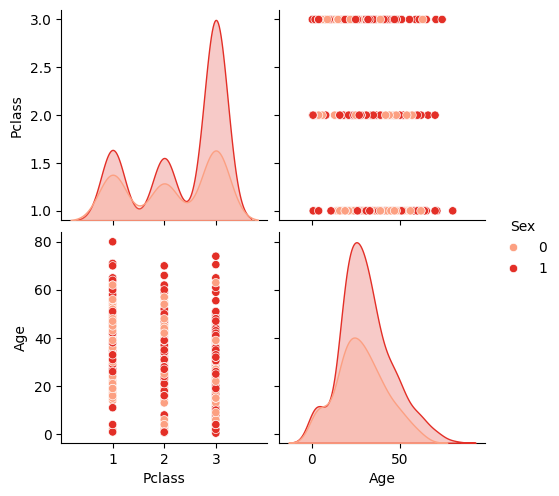

In [10]:
import seaborn as sns
sns.pairplot(df[['Pclass','Age','Sex']],palette='Reds',hue ='Sex')

### Filling the missing values with it's mean

In [11]:
X.Age.fillna(X.Age.mean(),inplace=True)

In [12]:
X.isna().sum()

Pclass    0
Age       0
Sex       0
dtype: int64

In [13]:
X

,Pclass,Age,Sex
0,3,22.000000,male
1,1,38.000000,female
2,3,26.000000,female
3,1,35.000000,female
4,3,35.000000,male
...,...,...,...
886,2,27.000000,male
887,1,19.000000,female
888,3,29.699118,female
889,1,26.000000,male


### Label Encoding

In [14]:
le = LabelEncoder()
Gender = le.fit_transform(df.Sex) #1-represnts male ,2 represents female

In [15]:
X['Gender'] = Gender
X.drop('Sex',axis = 1,inplace = True)

In [16]:
X

,Pclass,Age,Gender
0,3,22.000000,1
1,1,38.000000,0
2,3,26.000000,0
3,1,35.000000,0
4,3,35.000000,1
...,...,...,...
886,2,27.000000,1
887,1,19.000000,0
888,3,29.699118,0
889,1,26.000000,1


In [17]:
X.isnull().sum()

Pclass    0
Age       0
Gender    0
dtype: int64

## Splitting the Data

In [18]:
from sklearn.model_selection import train_test_split


In [19]:
y = df.Survived

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state= 42,test_size=0.2)

In [21]:
len(X_train)

712

In [22]:
len(X_test)

179

### Training the Model

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lr =LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [25]:
lr.score(X_test,y_test)

0.8100558659217877

In [26]:
# Predict the labels for X_test
y_pred = lr.predict(X_test)

# Now print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [27]:

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


### Predictin the model with new Text

In [28]:
if lr.predict([[1,38,1]])[0] == 1:
    print('Survived')
else:
    print("Not Survived")

Not Survived


In [29]:
import pickle

In [32]:
pickle.dump(lr,open("Titanic_Prediction.pkl",'wb'))

In [37]:
import streamlit as st